In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt



In [63]:

df = pd.read_csv('data/ai_job_market_insights.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [11]:
print( df.head())

               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2             Yes         

In [12]:
# Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))

Job_Title - 0%
Industry - 0%
Company_Size - 0%
Location - 0%
AI_Adoption_Level - 0%
Automation_Risk - 0%
Required_Skills - 0%
Salary_USD - 0%
Remote_Friendly - 0%
Job_Growth_Projection - 0%


In [14]:
# Store column names
column_names = df.columns.tolist()
print("Column names:", column_names)

Column names: ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD', 'Remote_Friendly', 'Job_Growth_Projection']


In [15]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [17]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

          Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614


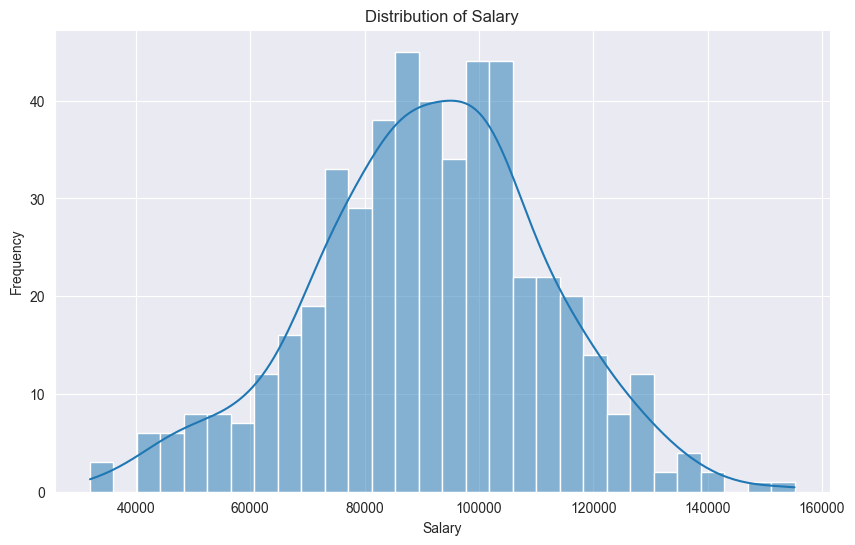

In [25]:
# Visualize the distribution of a numerical column (e.g., 'Salary')
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary_USD'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

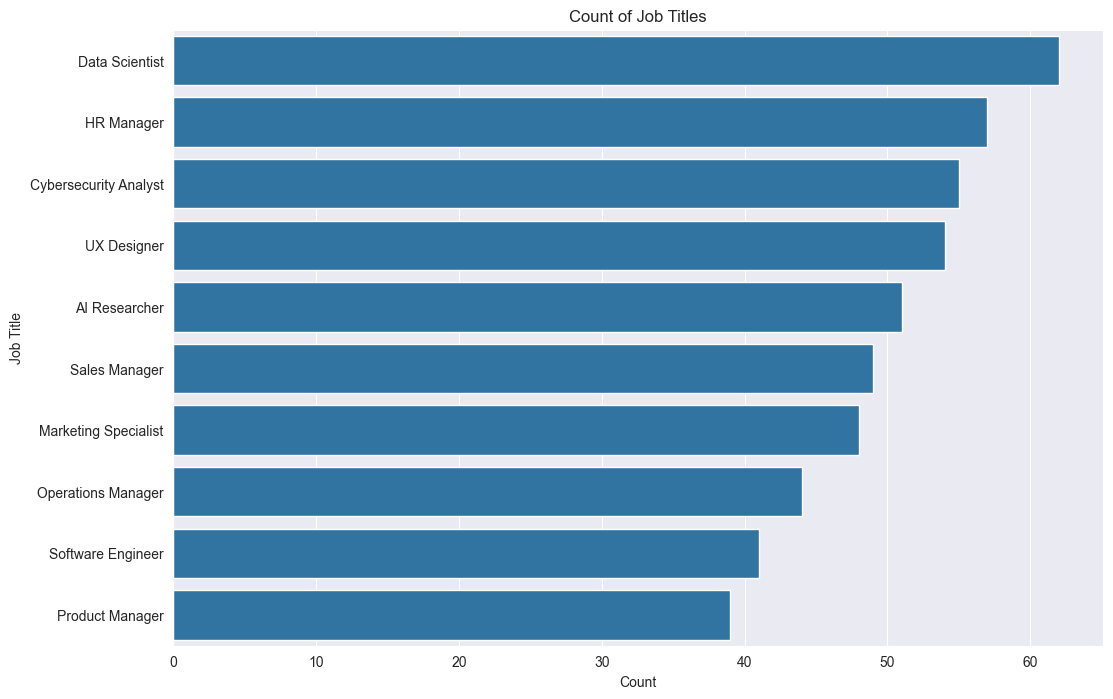

In [48]:
# Visualize the count of categorical column (e.g., 'Job_Title')
plt.figure(figsize=(12, 8))
sns.countplot(y='Job_Title', data=df, order=df['Job_Title'].value_counts().index)
plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

In [52]:
# Convert columns to numeric, forcing non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')


In [28]:
# Handle outliers using the IQR method with a more lenient threshold
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data shape after handling outliers:", df.shape)

Data shape after handling outliers: (495, 10)


In [29]:
# Fill NaN values with the mean of each column
df = df.fillna(df.mean())
print("Data shape after handling NaN values:", df.shape)

Data shape after handling NaN values: (495, 10)


In [55]:
# Ensure there are no NaN or infinite values left
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.mean())


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [66]:

y = df['Automation_Risk']


In [67]:
y.shape

(500,)

In [72]:

X = df.drop('Automation_Risk', axis=1)
y = df['Automation_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clasifation machine lerning

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [71]:
# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Data Scientist'

In [45]:
# Make predictions
y_pred = clf.predict(X_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined